In [2]:
import numpy as np

def A_matrix(n):
    A = np.zeros((n-1, n-1))
    for i in range(0, len(A)):
        for j in range(len(A[i])):
            if j == i - 1:
                A[i][j] = 1
            elif j == i:
                A[i][j] = -2
            elif j == i + 1:
                A[i][j] = 1
            else:
                A[i][j] = 0

    return A

def M_matrix(n):
    M = np.zeros((n-1, n-1))
    for i in range(0, len(M)):
        for j in range(len(M[i])):
            if j == i - 1:
                M[i][j] = 1
            elif j == i:
                M[i][j] = 4
            elif j == i + 1:
                M[i][j] = 1
            else:
                M[i][j] = 0

    return M



In [3]:
import numpy as np
def g_function(n, t):
    far_end = 0.01*np.sin(t)
    origin_end = -0.01*np.sin(t)

    g = np.zeros((n-1))
    g[0] = origin_end
    g[len(g)-1] = far_end

    #Dirichlet test for now, change later. This corresponds to both ends being fixed.
    g = np.zeros((n-1))

    return g


def ibvp_step(x, state, n, deltat, deltax, tk, a, b, A, M, I, c_squared):
    
    u = state[0]
    v = state[1]

    gt = g_function(n, tk)
    
    gt1 = g_function(n, tk+deltat)

    M_inv = np.linalg.inv(M)

    uplus = v
    vplus = np.linalg.solve(I - 1/2*deltat*(c_squared/deltax)*6/deltax*M_inv@A, u + 6/deltax*M_inv@(1/2*deltat*((c_squared/deltax)*(A@u) + gt + gt1)) )
    
    return uplus, vplus
    

def solve_ibvp(state_initial, deltat, deltax, T, a, b, c_squared):
    n = int(abs((b-a)/deltax))
    nt = int(abs(T/deltat))
    x = np.linspace(a+deltax, b-deltax, num=n-1)
    t = np.linspace(0, T, num=nt+1)
    A = A_matrix(n)
    M = M_matrix(n)
    I = np.identity(n-1)
    
    uhat = [state_initial[0]]
    vhat = [state_initial[1]]
    for h in range(len(t)-1):
        state_hat = np.array([uhat[h], vhat[h]])
        uplus, vplus = ibvp_step(x, state_hat, n, deltat, deltax, t[h], a, b, A, M, I, c_squared)
        uhat.append(uplus)
        vhat.append(vplus)
        
    return uhat, vhat, x, t

In [4]:
import numpy as np

a = 0
b = 2*np.pi
c_squared = 68.9e9 / 2710
deltat = 0.01
deltax = 0.001
T = 1
n = int(abs((b-a)/deltax))
nt = int(abs(T/deltat))
x = np.linspace(a+deltax, b-deltax, num=n-1)

ui = np.sin(x)
vi = np.zeros((n-1))
initial_state = [ui, vi]


uhat, vhat, x, t = solve_ibvp(initial_state, deltat, deltax, T, a, b, c_squared)



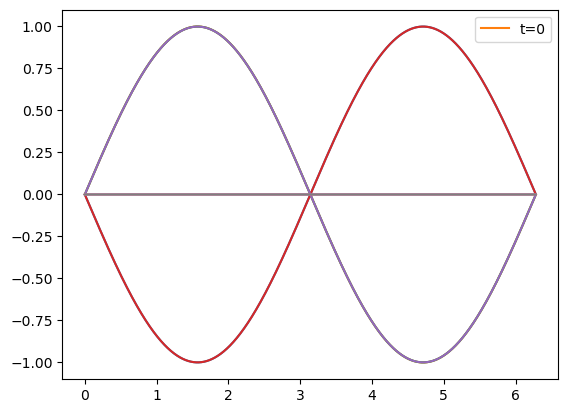

[array([ 0.001     ,  0.00200003,  0.00300005, ..., -0.00300005,
       -0.00200003, -0.001     ]), array([0., 0., 0., ..., 0., 0., 0.]), array([-0.00099998, -0.002     , -0.00300001, ...,  0.00300001,
        0.002     ,  0.00099998]), array([ 0.,  0., -0., ..., -0., -0.,  0.]), array([ 0.00099997,  0.00199997,  0.00299996, ..., -0.00299996,
       -0.00199997, -0.00099997]), array([ 0.,  0., -0., ..., -0., -0.,  0.]), array([-0.00099995, -0.00199993, -0.00299991, ...,  0.00299991,
        0.00199993,  0.00099995]), array([ 0.,  0., -0., ..., -0., -0.,  0.]), array([ 0.00099994,  0.0019999 ,  0.00299987, ..., -0.00299987,
       -0.0019999 , -0.00099994]), array([ 0.,  0., -0., ..., -0., -0.,  0.]), array([-0.00099992, -0.00199987, -0.00299982, ...,  0.00299982,
        0.00199987,  0.00099992]), array([ 0.,  0., -0., ..., -0., -0.,  0.]), array([ 0.00099991,  0.00199984,  0.00299977, ..., -0.00299977,
       -0.00199984, -0.00099991]), array([ 0.,  0., -0., ..., -0., -0.,  0.]), arra

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(x, uhat[50])
plt.plot(x, uhat[0], label='t=0')
plt.plot(x, uhat[60])
plt.plot(x, uhat[70])
plt.plot(x, uhat[80])
plt.plot(x, uhat[75])
plt.plot(x, uhat[85])
plt.plot(x, uhat[73])
plt.legend()
plt.show()

print(uhat)